"Joshua K. Cage 저자 임선집 옮긴이의 101가지 문제로 배우는 딥러닝 허깅페이스 트랜스포머 with 파이토치(Python Transformers By Huggingface Hands On:)의 예제를 실행한 것임을 알립니다.    This code has been brought from the GitHub repository below and has been slightly modified.:

In [1]:

# transformer install
!pip install transformers

# Python 결함 문자열을 고치는 ftfy 라이브러리 알아보기
# Python에서 결함있는 문자열을 유니코드 텍스트로 자동 변환되는 ftfy 라이브러리

!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00


In [2]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 이미지를 처리하기 위해, Pillow 라이브러리 사용, 이미지 불러오기
from PIL import Image
# 우리는 url 에서 사진을 가지고 오지 않으므로, requests 라이브러리는 필요하지 않음
#import requests

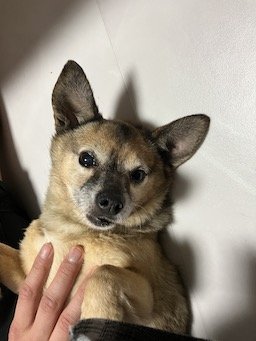

In [16]:
# 이미지 출력
# image = Image.open("/content/drive/MyDrive/4-2MachineLearning/huggingface/IMG_1967.JPG")
# image
image1 =Image.open("/content/drive/MyDrive/4-2MachineLearning/huggingface/IMG_1967 (1).JPG")
image1

- CLIP 프로세서는 이미지와 텍스트 데이터를 공통의 임베딩 공간에 매핑하고, 이를 통해 다양한 응용 프로그램 및 작업을 수행할 수 있게 함

- CLIP 모델은 이러한 프로세서를 사용하여 이미지와 텍스트 간의 의미적 관련성을 파악하고 활용하는 데 도움

In [5]:

# 모델 및 프로세서 불러오기
# 사용할 모델은 CLIP모델
from transformers import CLIPProcessor, CLIPModel


model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [6]:
# 모델 출력
model


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [17]:
# 텍스트를 리스트 타입으로 입력
candidates = ["three cats lying on the couch", "a photo of a cat", "a photo of a dog", "a lion", "two cats lying on the cushion"]

# 프로세서(ClIPPprocessor)에 텍스트 및 이미지를 입력하여 인코딩
inputs = processor(text=candidates, images=image1, return_tensors="pt", padding=True)

# inputs 출력
inputs

{'input_ids': tensor([[49406,  2097,  3989,  7175,   525,   518, 12724, 49407],
        [49406,   320,  1125,   539,   320,  2368, 49407, 49407],
        [49406,   320,  1125,   539,   320,  1929, 49407, 49407],
        [49406,   320,  5567, 49407, 49407, 49407, 49407, 49407],
        [49406,  1237,  3989,  7175,   525,   518, 20853, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-0.5222, -0.5076, -0.5076,  ...,  1.4924,  1.4632,  1.4486],
          [-0.5222, -0.5076, -0.4930,  ...,  1.5362,  1.5216,  1.5070],
          [-0.5222, -0.5076, -0.4930,  ...,  1.5946,  1.4924,  1.4924],
          ...,
          [-0.8142, -1.1645, -1.5295,  ..., -0.4346, -0.5076, -0.5806],
          [-0.9310, -1.1791, -1.4565,  ..., -0.4346, -0.4930, -0.5368],
          [-1.2083, -1.3981, -1.5733,  ..., -0.4492, -0.5076, -0.5514]],


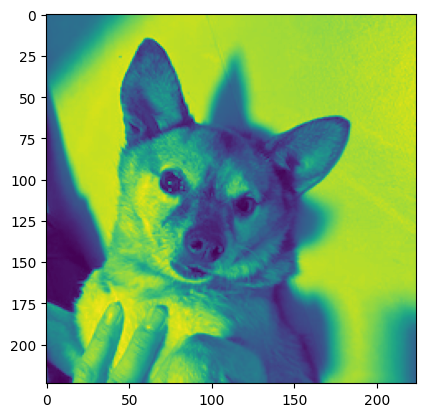

In [18]:
# 인코딩한 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][0]);

In [19]:
inputs['pixel_values'].shape # [1, 3, 224, 224]

inputs['pixel_values'][0].shape # [3, 224, 224]
# 아마 embedding된 단어의 크기가 1이어서..?

torch.Size([3, 224, 224])

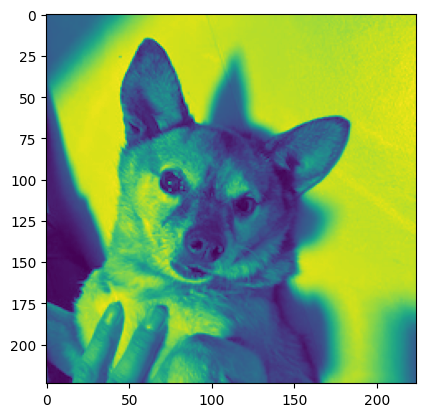

In [20]:
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][1]);

In [21]:
inputs['input_ids'][0]
# 이 키는 텍스트 입력의 토큰 ID를 가리킴.
#토큰 ID는 각 단어 또는 서브워드(subword) 토큰에 대응하는 정수 값.
#이것은 텍스트 시퀀스를 모델이 이해할 수 있는 형태로 변환하는 역할

tensor([49406,  2097,  3989,  7175,   525,   518, 12724, 49407])

In [22]:
processor.tokenizer.decode(inputs['input_ids'][0])
# input_ids[0]를 decoding 하는 것.

'<|startoftext|>three cats lying on the couch <|endoftext|>'

In [23]:
# 모델을 eval 모드로 전환
# 모델을 추론하거나 평가하는 모드로 전환한것.
model.eval()

# **inputs에서의 ** 표시는 inputs 변수가 키(key)와 값(value)로 이루어져 있을 때
# input 변수에 담긴 키와 값을 모두 모델에 입력하는 용도임
outputs = model(**inputs)

# 출력물 outputs의 키(key) 출력
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [24]:
logits_per_image = outputs.logits_per_image
# 이것은 이미지와 텍스트 입력을 사용하여 모델이 어떤 클래스 또는 레이블에 대한 확률 예측을 내보내는 부분.
print(logits_per_image)

tensor([[14.5444, 22.1884, 27.4372, 21.1118, 14.5735]], grad_fn=<TBackward0>)


In [25]:

# logits_per_image에 담긴 값을 입력값 행별로(dim=1) 소프트맥스 함수에 투입
probs = logits_per_image.softmax(dim=1)

import torch

# 변수 probs에 담긴 값 중에 최고값의 인덱스를 argmax로 찾고
# item()을 통해 레이블 즉 제목을 출력
# 그 결과가 cadidates의 인덱스 값이 됨
print(candidates[torch.argmax(probs).item()])


a photo of a dog
